# Heart Disease Prediction using Classification Algorithm
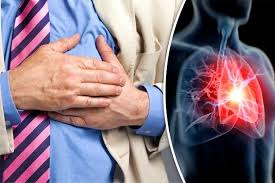

* A brief work is done on EDA and Modelling.
* I have achieved accuracy of 89% using Hyperparameter Optimization.
* If you find my work interesting, do upvote it.



## Problem statement

We are given with various clinical parameters of a patient and we have to predict whether or not she is suffereing from heart disease.

## Features

* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type)
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECH (resting electrocardiographic results)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* TARGET (1 or 0)

## Introduction

The three major portion of this notebook are:-

1. Exploratory Data Analysis
2. Feature Engineering
3. Modeling with Hyperparameter Optimization

**This is default first cell in any kaggle kernel. They import NumPy and Pandas libraries and it also lists the available Kernel files. NumPy is the fundamental package for scientific computing with Python. Pandas is the most popular python library that is used for data analysis.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Necessary Libraries

In [ ]:
# Plotting Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

# Metrics for Classification technique

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler

from sklearn.preprocessing import RobustScaler, StandardScaler

# Cross Validation

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# Linear Models

from sklearn.linear_model import LogisticRegression

# Ensemble Technique

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Other model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model Stacking 

from mlxtend.classifier import StackingCVClassifier

# Other libraries

from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.impute import SimpleImputer
from numpy import nan
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

## Data Loading

Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [ ]:
# Importing Data

df = pd.read_csv("../input/heart-disease-uci/heart.csv")
data = df.copy()
df.head(6) # Mention no of rows to be displayed from the top in the argument

# Exploratory Data Analysis 

In [ ]:
#Size of the dataset

n = df.shape[0]
m = df.shape[1]

print("No of rows - ",n,"| No of columns - ",m)

**We have a dataset with 303 rows which indicates a smaller set of data.**

In [ ]:
df.info()

* Out of 14 features, we have 13 int type and only one with float data type.
* Woah! We have no missing values in our dataset.

In [ ]:
df.describe().transpose()

**Let's check correleation between various features.**

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidth = 4,linecolor='black')
plt.tight_layout()

**Let's check the correlation of various features with the target feature.**

In [ ]:
# plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.tight_layout()

* Four feature( "cp", "restecg", "thalach", "slope" ) are positively correlated with the target feature.
* Other features are negatively correlated with the target feature.

**Individual Feature Analysis**

## Age("age") Analysis

In [ ]:
# Let's check 10 ages and their count

plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

**Let's check the range of age in the dataset.**

In [ ]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

**We should divide the Age feature into three parts - "Young", "Middle" and "Elder"**

In [ ]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

In [ ]:
plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**A large proportion of dataset contains Elder people.**

In [ ]:
data['AgeRange']=0
youngAge_index=data[(data.age>=29)&(data.age<40)].index
middleAge_index=data[(data.age>=40)&(data.age<55)].index
elderlyAge_index=data[(data.age>55)].index

In [ ]:
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0

**Let's plot the relation between Age Group and Sex feature.**

In [ ]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="sex")
plt.tight_layout()

**Let's plot the relation between Age Group and Target feature.**

In [ ]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="sex")
plt.tight_layout()

**Elderly people are more likely to suffer from heart disease.**

In [ ]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

## Sex("sex") Feature Analysis

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'])
plt.tight_layout()

**Ratio of Male to Female is approx 2:1**

In [ ]:
# Let's plot the relation between sex and slope.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'],hue=df["slope"])
plt.tight_layout()

In [ ]:
# Let's plot the relation between sex and Age Group.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["AgeRange"])
plt.tight_layout()

In [ ]:
# Let's plot the relation between sex and target.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["target"])
plt.tight_layout()

**Males are more likely to have heart disease than Female.**

## Chest Pain Type("cp") Analysis

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

**As seen, there are 4 types of chest pain**

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'],hue=data["sex"])
plt.tight_layout()

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'],hue=data["target"])
plt.tight_layout()

* People having least chest pain are not likely to heart disease.
* People having severe chest pain are  likely to heart disease.

In [ ]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="cp")
plt.tight_layout()

**Elderly people are more likely to have chest pain.**

# Thal Analysis

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

1. 3 = normal
2. 6 = fixed defect
3. 7 = reversable defect

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'],hue=data["target"])
plt.tight_layout()

**People with fixed defect are more likely to have heart disease.**

In [ ]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="thal")
plt.tight_layout()

## Target 

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

**The ratio between 1 and 0 is much less than 1.5 which indicates that target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.**

In [ ]:

target_0_agerang_0=len(data[(data.target==0)&(data.AgeRange==0)])
target_1_agerang_0=len(data[(data.target==1)&(data.AgeRange==0)])

In [ ]:
colors = ['green','red']
explode = [0,0.1]
plt.figure(figsize = (10,10))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0','Target 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.tight_layout()

In [ ]:
target_0_agerang_1=len(data[(data.target==0)&(data.AgeRange==1)])
target_1_agerang_1=len(data[(data.target==1)&(data.AgeRange==1)])

In [ ]:
colors = ['green','red']
explode = [0.1,0]
plt.figure(figsize = (10,10))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0','Target 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

In [ ]:
target_0_agerang_2=len(data[(data.target==0)&(data.AgeRange==2)])
target_1_agerang_2=len(data[(data.target==1)&(data.AgeRange==2)])

In [ ]:
colors = ['green','red']
explode = [0,0.1]
plt.figure(figsize = (10,10))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0','Target 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

# Feature Enginnering

In [ ]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("#######")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val.remove('target')
dfs = pd.get_dummies(df, columns = categorical_val)

In [ ]:
dfs.head(6)

In [ ]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

In [ ]:
dfs.head(6)

# Modelling

**Splitting our dataset**

In [ ]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will work on following algo - 

* KNN
* Random Forest Classifier
* XGBoost
* CatBoost

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred1 = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))

In [ ]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

**At K=19, we are getting highest test accuracy.**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred1 = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))

**We achieved accuracy 89% with KNN Model after Hyperparameter Optimization.**

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))

In [ ]:
## Hyperparameter Optimization

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

params2 ={
    
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth, 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfcs = RandomizedSearchCV(estimator=rfc, param_distributions=params2, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rfcs.fit(X_train,y_train)

In [ ]:
rfcs.best_estimator_

In [ ]:
model2 = RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=42)

In [ ]:
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))

**We achieved accuracy 86% approx with Random Forest Classifier Model. There is no improvement after Hyperparameter Optimization.**

## XGBoost

In [ ]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)
y_pred3 = xgb.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred3))

**We achieved accuracy 82% approx with XGBoost Classifier Model.**

## CatBoost

In [ ]:
model4 = CatBoostClassifier(random_state=42)

In [ ]:
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred4))

**We achieved accuracy 81% approx with CatBoost Classifier Model.**

**So far the best accuracy is achieved through KNN Model which is 89%.**

# Thank You!!